# Git Repository Bringup

In [1]:
!git version

git version 2.34.1


In [2]:
!git clone https://github.com/ramwtz/data-science-project.git

Cloning into 'data-science-project'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 179 (delta 81), reused 116 (delta 47), pack-reused 0
Receiving objects: 100% (179/179), 21.33 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [3]:
!ls

data-science-project  sample_data


In [4]:
%cd data-science-project/

/content/data-science-project


In [5]:
!pwd

/content/data-science-project


In [6]:
!git switch dev/ram

Branch 'dev/ram' set up to track remote branch 'dev/ram' from 'origin'.
Switched to a new branch 'dev/ram'


In [7]:
!git pull

Already up to date.


In [8]:
%cd ..

/content


# Basic Bringup for Remote Environment

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Necessary packages for this nb
!pip install --quiet --upgrade -r '/content/data-science-project/dependencies.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 57.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 130.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

# Initialize Env

## Imports

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

time: 527 µs (started: 2023-10-01 18:57:01 +00:00)


## Configs

In [15]:
%load_ext autotime

pd.options.mode.chained_assignment = None  # default='warn'
tqdm.pandas()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.17 ms (started: 2023-10-01 18:57:01 +00:00)


## Paths

In [16]:
gen_data_dir = os.path.join('drive', 'MyDrive', 'project', 'data')
calls_dir = os.path.join(gen_data_dir, 'calls')
new_data_dir = os.path.join(gen_data_dir, 'new')
models_path = os.path.join('drive', 'MyDrive', 'model')
metadata_path = os.path.join(calls_dir, '911_first6sec', '911_metadata_6sec.csv')

time: 693 µs (started: 2023-10-01 18:57:01 +00:00)


# Text-based CNN Model
Based on [[Mandelbaum and Shalev, 2016]](https://arxiv.org/pdf/1610.08229.pdf) using a random embedding.

## Creating Features and Classes

### Imports

In [17]:
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

time: 9.24 s (started: 2023-10-01 18:57:34 +00:00)


### Defs

### Arranging the Data

In [18]:
metadata = pd.read_csv(metadata_path)
metadata.drop_duplicates(subset=['filename'], inplace=True)
metadata.reset_index(drop=True, inplace=True)
print(metadata.count())

id                 707
event_id           707
link               707
title              707
date               686
state              699
deaths             706
potential_death    706
false_alarm        706
description        699
deaths_binary      707
break              707
filename           707
dtype: int64
time: 5.09 s (started: 2023-10-01 18:57:43 +00:00)


In [19]:
model_data = metadata[['filename', 'deaths_binary']]
model_data

,filename,deaths_binary
0,911_first6sec/call_2_0.wav,1
1,911_first6sec/call_8_0.wav,1
2,911_first6sec/call_9_0.wav,0
3,911_first6sec/call_10_0.wav,1
4,911_first6sec/call_11_0.wav,0
...,...,...
702,911_first6sec/call_739_0.wav,0
703,911_first6sec/call_740_0.wav,0
704,911_first6sec/call_741_0.wav,1
705,911_first6sec/call_742_0.wav,1


time: 9.61 ms (started: 2023-10-01 18:57:48 +00:00)


In [20]:
transcriptions_path = os.path.join(calls_dir, '911_first6sec', 'transcriptions')
transcriptions = pd.read_csv(transcriptions_path)
model_data['transcription'] = transcriptions['medium']
model_data

,filename,deaths_binary,transcription
0,911_first6sec/call_2_0.wav,1,My mom had a bad time.
1,911_first6sec/call_8_0.wav,1,Hello. Hello. Is everything okay? Um.
2,911_first6sec/call_9_0.wav,0,I need a police officer over here at 7th. Wha...
3,911_first6sec/call_10_0.wav,1,"Ma'am, my pickup was stolen. I had to go find..."
4,911_first6sec/call_11_0.wav,0,No ma'am I don't. I don't have an emergency. ...
...,...,...,...
702,911_first6sec/call_739_0.wav,0,She's not waking up. Okay. What's her address?
703,911_first6sec/call_740_0.wav,0,I just shot the Mormon bishop over here on Tu...
704,911_first6sec/call_741_0.wav,1,And this guy has a gun in my hat. I need the ...
705,911_first6sec/call_742_0.wav,1,There are like at least four or five people w...


time: 244 ms (started: 2023-10-01 18:57:48 +00:00)


In [21]:
transcriptions['len'] = model_data['transcription'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(transcriptions.len.mean()))
print("max length of sentence: " + str(transcriptions.len.max()))
print("std dev length of sentence: " + str(transcriptions.len.std()))

mean length of sentence: 15.946251768033946
max length of sentence: 33
std dev length of sentence: 5.64807841263026
time: 2.89 ms (started: 2023-10-01 18:57:48 +00:00)


In [22]:
sequence_length = transcriptions.len.max()

time: 505 µs (started: 2023-10-01 18:57:48 +00:00)


In [23]:
max_features = 20000

tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>')
tokenizer.fit_on_texts(model_data['transcription'].values)
features = tokenizer.texts_to_sequences(model_data['transcription'].values)
# TODO maybe pad interlacing instead of in the begininng?
features = pad_sequences(features, sequence_length)
print(features)

[[  0   0   0 ...   4 364 365]
 [  0   0   0 ... 366  15  72]
 [  0   0   0 ...  41  34  10]
 ...
 [  0   0   0 ...   5 728 675]
 [  0   0   0 ...  13   2 729]
 [  0   0   0 ...   6 132  35]]
time: 23 ms (started: 2023-10-01 18:57:48 +00:00)


In [24]:
classes = pd.get_dummies(model_data['deaths_binary'], dtype='uint8').values
classes

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

time: 4.49 ms (started: 2023-10-01 18:57:48 +00:00)


In [26]:
model_data['vatorization'] = pd.Series(features.tolist())
model_data['classes'] = pd.Series(classes.tolist())
model_data.drop('deaths_binary', inplace=True, axis=1, errors='ignore')
model_data

,filename,transcription,vatorization,classes
0,911_first6sec/call_2_0.wav,My mom had a bad time.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
1,911_first6sec/call_8_0.wav,Hello. Hello. Is everything okay? Um.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
2,911_first6sec/call_9_0.wav,I need a police officer over here at 7th. Wha...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
3,911_first6sec/call_10_0.wav,"Ma'am, my pickup was stolen. I had to go find...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
4,911_first6sec/call_11_0.wav,No ma'am I don't. I don't have an emergency. ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
...,...,...,...,...
702,911_first6sec/call_739_0.wav,She's not waking up. Okay. What's her address?,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
703,911_first6sec/call_740_0.wav,I just shot the Mormon bishop over here on Tu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
704,911_first6sec/call_741_0.wav,And this guy has a gun in my hat. I need the ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 31, 81, 1...","[0, 1]"
705,911_first6sec/call_742_0.wav,There are like at least four or five people w...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 30...","[0, 1]"


time: 24.1 ms (started: 2023-10-01 18:58:23 +00:00)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    features, classes, test_size=0.25, shuffle=True, stratify=classes,
    random_state=0
    )

time: 5.87 ms (started: 2023-10-01 18:58:27 +00:00)


In [28]:
print(X_train)

[[   0    0    0 ...    7    2  414]
 [   0    0    0 ...   36  668  133]
 [   0    0    0 ...   31 1144   56]
 ...
 [   0    0    0 ...  111 1618 1619]
 [   0    0    0 ...    7    4   19]
 [   0    0    0 ...   16 1003 1004]]
time: 678 µs (started: 2023-10-01 18:58:31 +00:00)


In [29]:
print(y_train)

[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
time: 1.38 ms (started: 2023-10-01 18:58:32 +00:00)


## Model Training

### Imports

In [30]:
from tensorflow.keras import models, layers, optimizers, callbacks, regularizers
from tensorflow.keras.utils import plot_model

time: 30.9 ms (started: 2023-10-01 18:58:34 +00:00)


### Train

In [31]:
def cnn_model(embedding_dim, num_filters, dropout_rate=0.5,
              loss='categorical_crossentropy',  optimizer_name='Adam',
              learning_rate=0.001):
  #
  inputs = layers.Input(shape=(sequence_length,), dtype='int32')

  #
  emb_layr = layers.Embedding(
      input_dim=max_features, output_dim=embedding_dim, input_length=sequence_length)(inputs)

  #
  reshape = layers.Reshape((sequence_length, embedding_dim, 1))(emb_layr)

  #
  conv_0 = layers.Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_0 = layers.MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)

  #
  conv_1 = layers.Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_1 = layers.MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)

  #
  conv_2 = layers.Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_2 = layers.MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

  #
  concatenated_tensor = layers.Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
  flatten = layers.Flatten()(concatenated_tensor)

  #
  dropout = layers.Dropout(dropout_rate)(flatten)

  #
  output = layers.Dense(units=2, activation='softmax')(dropout)

  opt = getattr(optimizers, optimizer_name)
  tm = models.Model(inputs=inputs, outputs=output)
  tm.compile(loss=loss, optimizer=opt(learning_rate), metrics=['accuracy'])

  return tm

time: 1.22 ms (started: 2023-10-01 18:58:34 +00:00)


In [84]:
embedding_dim = 200
num_filters = 100
learning_rate = 0.001

text_model = cnn_model(embedding_dim, num_filters, learning_rate=0.005)
print(text_model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 33)]                 0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 33, 200)              4000000   ['input_6[0][0]']             
                                                                                                  
 reshape_5 (Reshape)         (None, 33, 200, 1)           0         ['embedding_5[0][0]']         
                                                                                                  
 conv2d_15 (Conv2D)          (None, 31, 1, 100)           60100     ['reshape_5[0][0]']           
                                                                                            

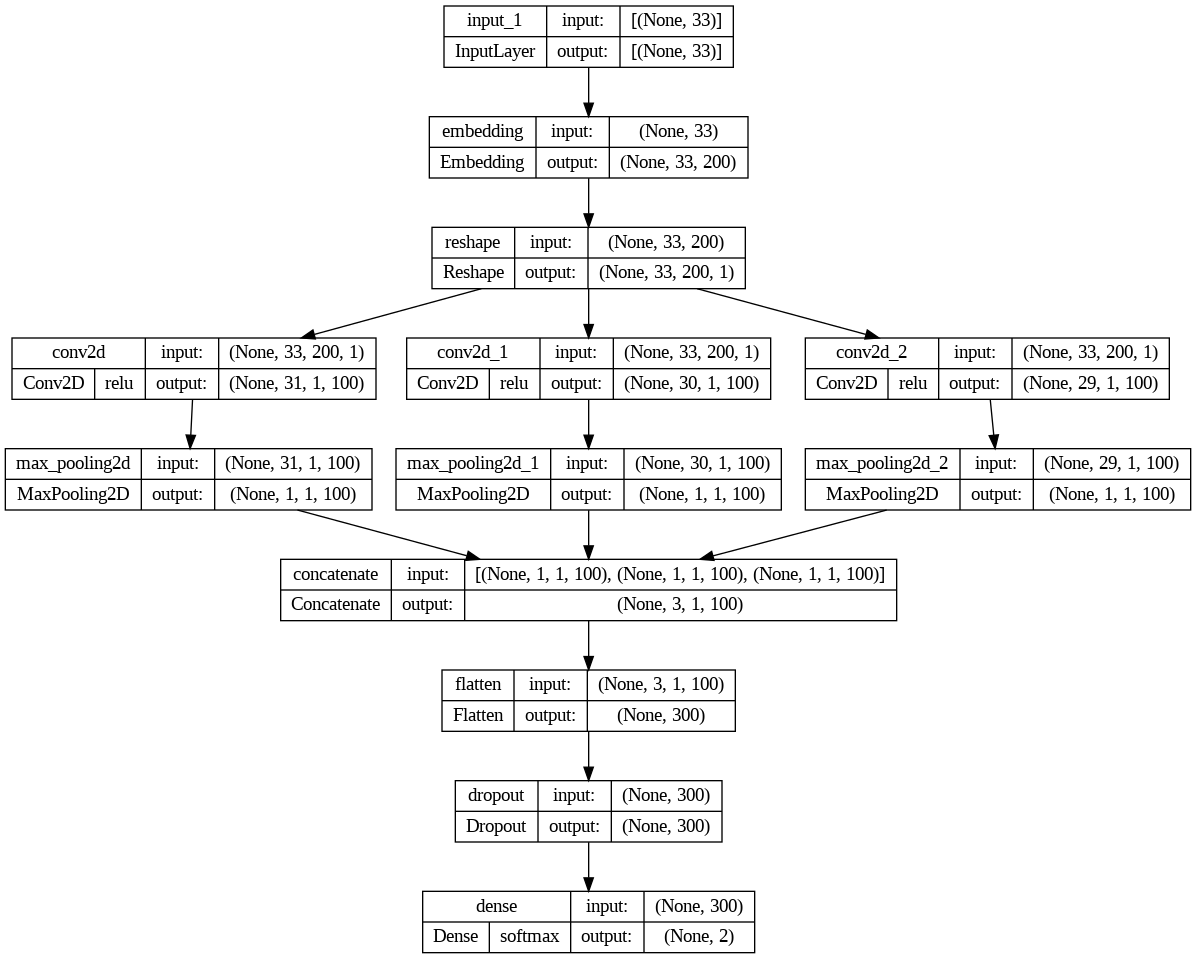

time: 250 ms (started: 2023-10-01 18:58:35 +00:00)


In [33]:
plot_model(text_model, show_shapes=True, show_layer_activations=True)

In [85]:
verbosity = 1
batch_size = 32
epochs = 50

# define callbacks
reduce_lr_callback = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001,
    verbose=verbosity)

earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    restore_best_weights=True,
    min_delta=0.001,
    patience=10,
    start_from_epoch=25,
    verbose=verbosity)

text_history = text_model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr_callback, earlystopping],
    verbose=verbosity)

Epoch 1/50
17/17 [==============================] - 2s 69ms/step - loss: 4.7112 - accuracy: 0.5736 - val_loss: 1.7419 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 2/50
17/17 [==============================] - 1s 60ms/step - loss: 1.2189 - accuracy: 0.5906 - val_loss: 0.8557 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 3/50
17/17 [==============================] - 1s 60ms/step - loss: 0.7777 - accuracy: 0.5906 - val_loss: 0.7129 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 4/50
17/17 [==============================] - 1s 62ms/step - loss: 0.6965 - accuracy: 0.5906 - val_loss: 0.6856 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 5/50
17/17 [==============================] - 1s 60ms/step - loss: 0.6823 - accuracy: 0.5906 - val_loss: 0.6807 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 6/50
17/17 [==============================] - 1s 67ms/step - loss: 0.6826 - accuracy: 0.5906 - val_loss: 0.6810 - val_accuracy: 0.5932 - lr: 0.0050
Epoch 7/50
17/17 [==============================] - 2s 91ms/step - loss: 0.6

## Model Assessment

### Imports

In [86]:
from sklearn import metrics

time: 316 µs (started: 2023-10-01 19:28:47 +00:00)


### Fitting Progression

In [87]:
fit_history = pd.DataFrame(text_history.history)
print(f'Number of Actual Epochs: {fit_history.shape[0]}')

Number of Actual Epochs: 36
time: 2.42 ms (started: 2023-10-01 19:28:47 +00:00)


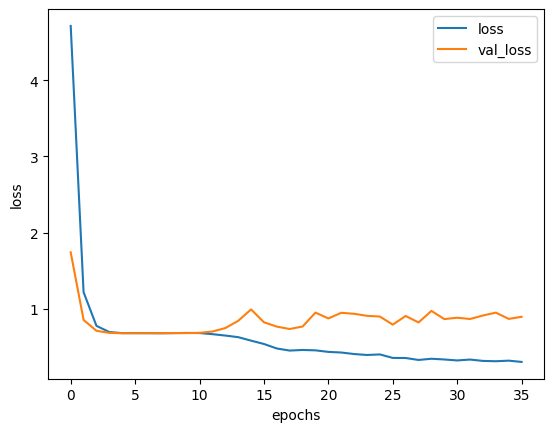

time: 16.8 s (started: 2023-10-01 19:28:47 +00:00)


In [88]:
loss_history = fit_history[['loss','val_loss']]
loss_history.plot(title='', xlabel='epochs', ylabel='loss')
plt.show()

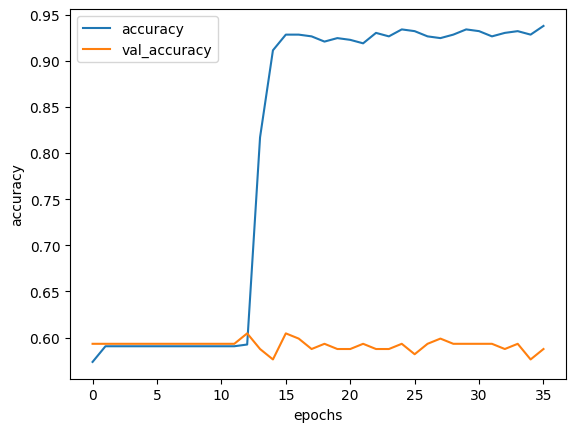

time: 183 ms (started: 2023-10-01 19:29:04 +00:00)


In [89]:
accuracy_history = fit_history[['accuracy','val_accuracy']]
accuracy_history.plot(
    title='', xlabel='epochs', ylabel='accuracy')
plt.show()

### Evaluation

In [90]:
# create assessment values
y_probability = text_model.predict(X_test, verbose=0)
y_test_binary = np.argmax(y_test, axis=-1)
y_predicted_binary = np.argmax(y_probability, axis=-1)

time: 141 ms (started: 2023-10-01 19:29:04 +00:00)


In [91]:
test_accuracy = text_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_accuracy[0]}')
print(f'Test Accuracy: {test_accuracy[1]}')

Test loss: 0.7937788367271423
Test Accuracy: 0.5819209218025208
time: 94.1 ms (started: 2023-10-01 19:29:04 +00:00)


In [92]:
small_model_report = metrics.classification_report(
    y_test_binary, y_predicted_binary, digits=4,
    target_names=['Non-Fatal','Fatal'])
print(small_model_report)

              precision    recall  f1-score   support

   Non-Fatal     0.4900    0.6806    0.5698        72
       Fatal     0.7013    0.5143    0.5934       105

    accuracy                         0.5819       177
   macro avg     0.5956    0.5974    0.5816       177
weighted avg     0.6153    0.5819    0.5838       177

time: 11.9 ms (started: 2023-10-01 19:29:04 +00:00)


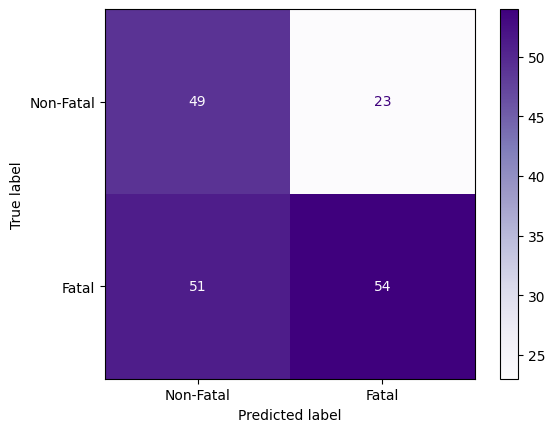

time: 172 ms (started: 2023-10-01 19:29:04 +00:00)


In [93]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test_binary, y_predicted_binary,
    display_labels=['Non-Fatal','Fatal'],
    cmap='Purples')
plt.show()

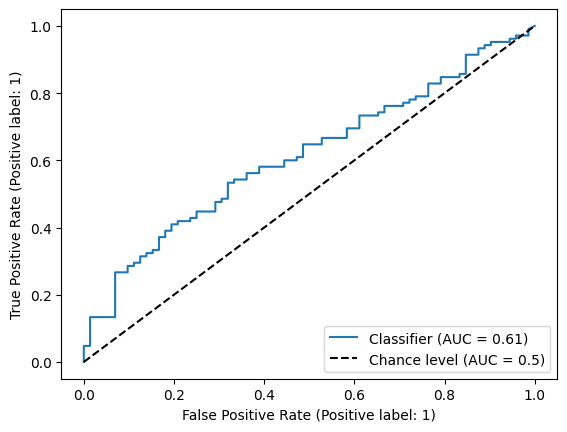

time: 171 ms (started: 2023-10-01 19:29:04 +00:00)


In [94]:
metrics.RocCurveDisplay.from_predictions(
    y_test_binary, y_probability[:, 1], plot_chance_level=True)
plt.show()